# PA005: High Value Custumer Identification (Insiders)

# 0.0 Planejamento da solução (IOT)

### Input - Entrada

1. Problema de Negócio
  - Selecionar os clientes mais valiosos para integrar um programa de fidelização
2. Conjunto de dados
  - Vendas de um Ecommerce Online, durante o período de um ano.

### Output - Saída

1. Indicação das pessoas que farão parte do programa Insiders
  - Lista: client_id | is_insider

2. Relatório com as respostas das perguntas de negócio.
  - Quem são as pessoas elegíveis para participar do programa de Insiders?
  - Quantos clientes farão parte do grupo?
  - Quais as principais características desse clientes?
  - Qual a porcentagem de contribuição do faturamento desses clientes, vinda do Insiders?
  - Qual a expectativa de faturamento desse grupo para os próximos meses?
  - Quais as condições para uma pessoa ser elegível ao Insiders?
  - Quais as condições para uma pessoa ser removida do Insiders?
  - Qual a garantia que o programa Insiders é melhor que o restante da base?
  - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de Insiders?
  - O que é ser elegível? O que são clientes de maior "valor"?
  - Faturamento:
    - Alto Ticket Médio
    - Alto LTV (Life Time Value - Gasto durante seu período de vida na empresa)
    - Baixo Recência
    - Alto basket size (tamanho da cesta de compra)
    - Baixa probabilidade de churn (parou de comprar)
    - Alta previsão LTV
    - Alta previsão de compra

  - Custo
    - Baixa taxa de devolução

  - Experiência de Compra
    - Média alta das avaliações

2. Quantos clientes farão parte do grupo?
  - Número total de clientes
  - Calcula a % do grupo Insiders

3. Quais as principais características desse clientes?
  - Escrever características do cliente
    - Idade
    - Localização
    
  - Ecrever características de consumo
    - Atributos da clusterização (perfil de compra do cliente)

4. Qual a porcentagem de contribuição do faturamento desses clientes, vinda do Insiders?
  - Faturamento total do ano
  - Faturamento do grupo Insiders

5. Qual a expectativa de faturamento desse grupo para os próximos meses?
  - LTV do grupo Insiders
  - Análise de Cohort (Marcação da pessoa, como por exemplo no tempo, perfil de pessoas que entraram no mesmo mês)

6. Quais as condições para uma pessoa ser elegível ao Insiders?
  - Definir a periodicidade (recorrência de rodar o modelo)
  - A pessoa precisa ser similar ou parecida com uma pessoa do grupo

7. Quais as condições para uma pessoa ser removida do Insiders?
  - Definir a periodicidade (recorrência de rodar o modelo)
  - A pessoa precisa ser disimilar ou s distanciar das médias do grupo

8. Qual a garantia que o programa Insiders é melhor que o restante da base?
  - Teste A/B
  - Teste A/B Baysiano
  - Teste de hipóteses
  
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
  - Desconto
  - Preferência de compra
  - Frete
  - Visita a empresa

## Benchmark de soluções

### 1. Desk Research - Pesquisa de soluções das outras empresas

- Modelo RFM
  1. Recência
    a. Tempo desde a última compra
    b. Responsividade

  2. Frequência
    a. Quantidade de compras em um período
    b. Engajamento

  3. Monetária
    a. Total gasto, faturamento
    b. Alto valor de compra

1. Passo 01:
  - Ordernar os clientes por Recência

2. Passo 02:
  - Dividir a base de clientes de acordo com as notas
    - Notas de 1 - 5 (5 notas possíveis)
    - Divide a base de clientes em 5 grupos de 20% cada
    - Quanto menor o valor, maior nota
  - Essa nota se chama R Score

3. Passo 03:
  - Ordernar is clientes pela Frequência

4. Passo 04:
  - Dar as notas de maneira similar ao passo 02
  - Essa nota se chama F Score
  - Quanto maior o valor, maior a nota

5. Passo 05:
  - Ordenar pelo monetário (faturamento)

6. Passo 06:
  - Dar as notas de maneira similar ao passo 02 e 04
  - Essa nota de chama M Score
  - Quanto maior o valor, maior a nota

7. Passo 07:7
  - Calcular a média das notas R,F,M
  - RFM Score (pode ordenar por essa média para ter os melhores clientes)

Definições que podem ser usadas para dividir os clientes com o RFM e assim direcionar esse clientes para as melhores ações

1. Champions
  - Compra recentes, frequentes com alto valor gasto
  - Prêmios para esses clientes

2. Potential Loyalists
  - Compras recentes, boa frequência e bom valor gasto
  - Programa de Fidelização e Upsell

3. New Custumers
  - Compra recente, baixa frequência
  - Construção de Relacionamento, ofertas especiais

4. At Risk Custumers
  - "Faz tempo que não compra"
  - Campanhas de reativação, ofertas, produtos

5. Can't Lose Them
  - Faz tempo que não compra e não viita o site


Com isso, você consegue entender:

1. Quem são seus melhores clientes?

2. Quais clientes estão próximos do Churn?

3. Quais os potenciais clientes para entrar no programa de Fidelização?

4. Quais clientes precisam ser retidos?

5. Quais clientes mais prováveis de responder as campanhas de marketing?

# <font color = "red"> 0.0 Início do Projeto </font>

## 0.1 Imports

In [1]:
import warnings

import pandas     as pd
import numpy      as np
import seaborn    as sns
import umap.umap_ as umap

from yellowbrick.cluster   import KElbowVisualizer
from yellowbrick.cluster   import SilhouetteVisualizer
from IPython.display       import Image
from IPython.core.display  import HTML

from matplotlib            import pyplot  as plt
from sklearn               import cluster as c
from sklearn               import metrics as m
from plotly                import express as px


warnings.filterwarnings( 'ignore' )

c:\Users\bruno.freitas\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 0.2 Helper Functions

In [2]:
def jupyter_settings():
    """Definições padrões setadas para o uso o Jupyter Notebook."""
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

#Executando a função
jupyter_settings();

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.3 Load Dataset

In [3]:
#load dat
df_raw = pd.read_csv('../data/Ecommerce/Ecommerce.csv',encoding='unicode_escape')

#drop extra column
df_raw = df_raw.drop(columns=['Unnamed: 8'],axis=1)

# <font color = "red"> 1.0 Descrição dos dados </font>

In [4]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [5]:
cols_new = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price','customer_id','country']
df1.columns = cols_new

In [6]:
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 1.2 Data Dimensions

In [7]:
print(f'Number of rows {df1.shape[0]}')
print(f'Number of cols {df1.shape[1]}')

Number of rows 541909
Number of cols 8


## 1.3 Data Types

In [8]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Check NA

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA

In [10]:
#removendo os na
df1 = df1.dropna(subset=['description','customer_id'])
print('Removed data: {:.2f}'.format(1 - (df1.shape[0] / df_raw.shape[0]))) #Quanto % de NA removeu do total

Removed data: 0.25


In [11]:
#Checando se os NA foram realmente removidos
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6 Change dtypes

In [12]:
#invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'],format='%d-%b-%y')

#customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

In [13]:
#Mostrando a mudança dos tupos
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.7 Descriptive Statistics

# <font color = "red"> 2.0 Feature Engeneering </font>

In [14]:
df2 = df1.copy()

## 2.1 Feature Creation

In [15]:
# Tabela de Referência
df_ref = df2.drop(['invoice_no','stock_code','description','quantity','invoice_date','unit_price','country'],axis=1).drop_duplicates(ignore_index=True)

In [16]:
#Gross Revenue - Faturamento Bruto - qtde * preço
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

#Monetary
df_monetary = df2.loc[:,['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id',how='left')

#Recency
df_recency = df2.loc[:,['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days #vetoriza a série para aplicar o day
df_recency = df_recency[['customer_id','recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id',how='left')


#frequency
df_freq = df2.loc[:,['customer_id','invoice_no']].groupby('customer_id').nunique().reset_index()
df_ref = pd.merge(df_ref, df_freq,on='customer_id',how='left')


#avg_ticket
df_tm = df2.loc[:,['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue' : 'avg_ticket'})
df_ref = pd.merge(df_ref, df_tm, on='customer_id',how='left')

df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5288.63,302,35,16.950737
1,13047,3079.10,31,18,15.709694
2,12583,7187.34,2,18,28.634821
3,13748,948.25,95,5,33.866071
4,15100,635.10,330,6,105.850000


# <font color = "red"> 3.0 Filtragem de Variáveis </font>

In [17]:
df3 = df_ref.copy()

# <font color = "red"> 4.0 EDA (Exploratory Data Analysis) </font>

In [18]:
df4 = df3.copy()

# <font color = "red"> 5.0 Data Preparation </font>

In [19]:
df5= df4.copy()

# <font color = "red"> 6.0 Feature Selection </font>

In [20]:
df6 = df5.copy()

# <font color = "red"> 7.0 Hyperparameter Fine-Tunning </font>

In [21]:
X = df6.drop(columns=['customer_id'])
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5288.63,302,35,16.950737
1,3079.10,31,18,15.709694
2,7187.34,2,18,28.634821
3,948.25,95,5,33.866071
4,635.10,330,6,105.850000


In [22]:
clusters = [2,3,4,5,6,7]

## 7.1 Within-Cluster Sum of Square (WSS)

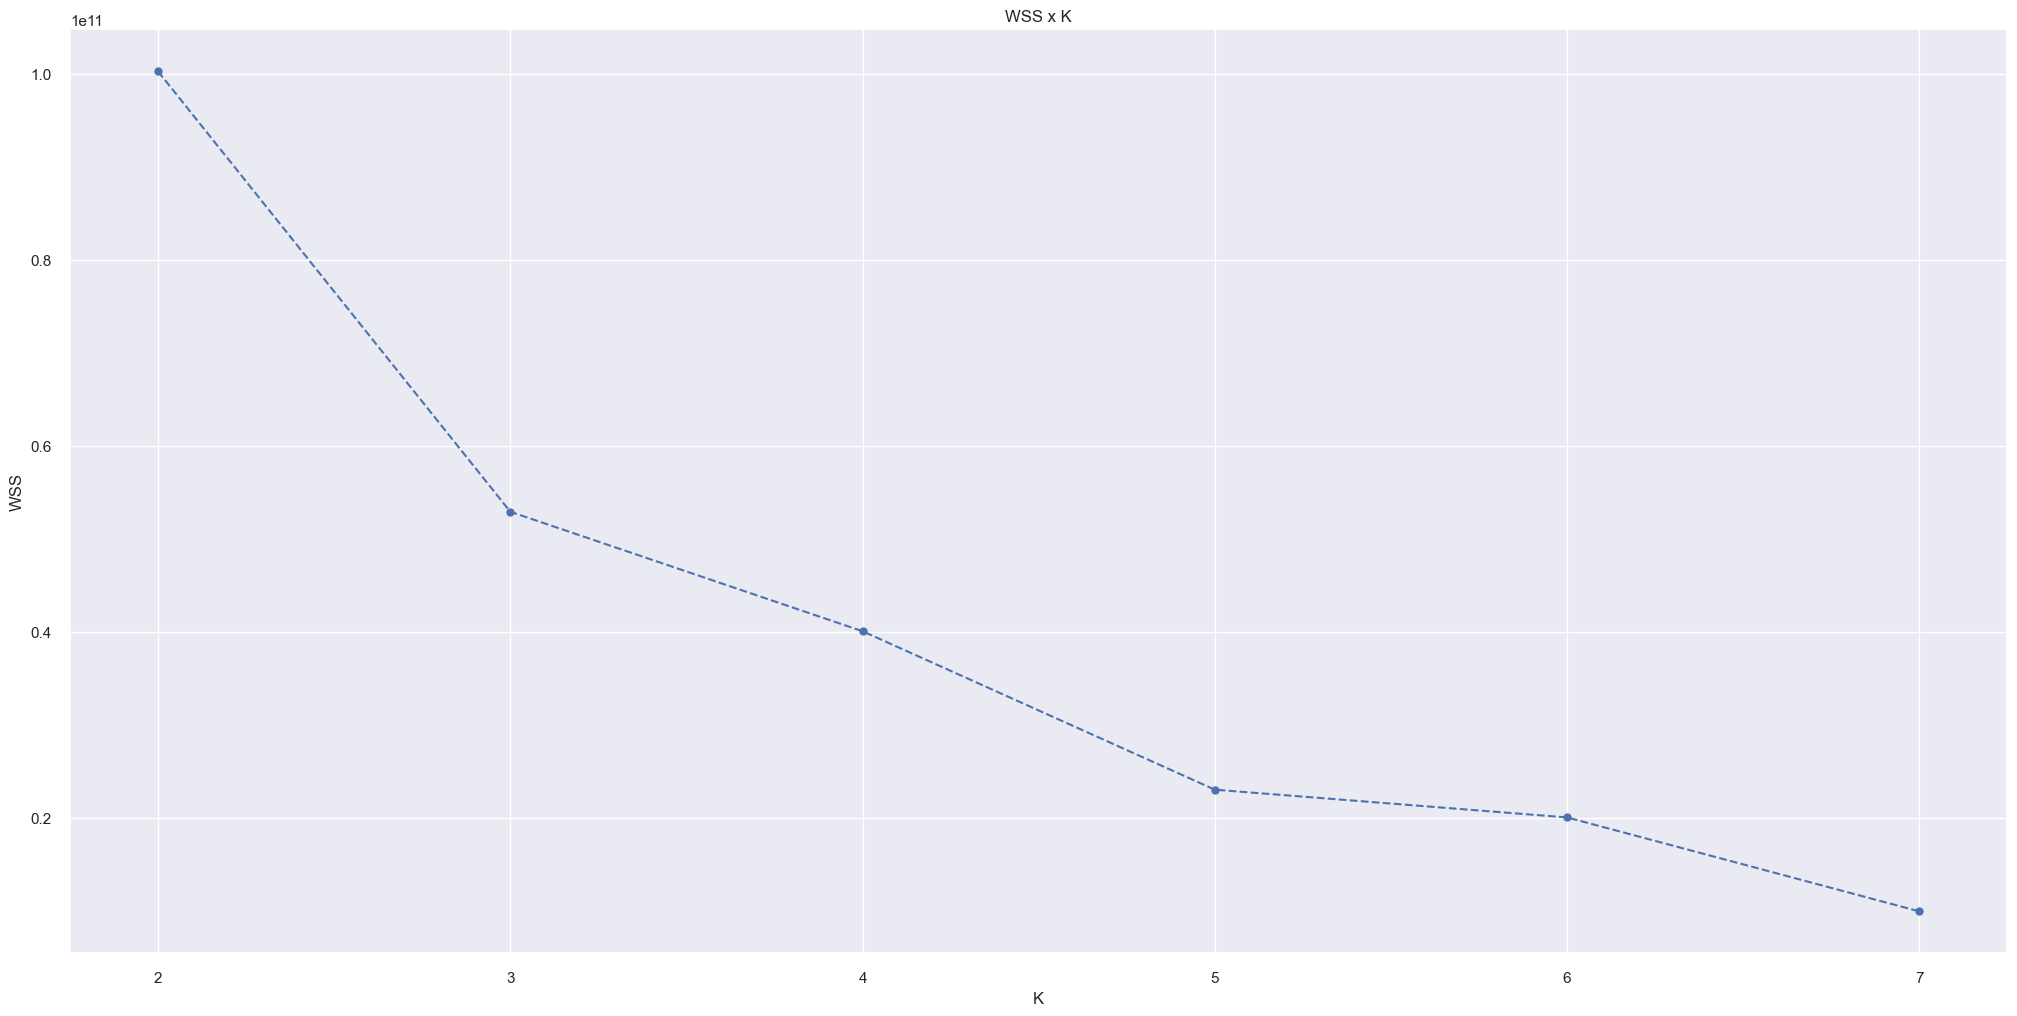

In [23]:
wss = []
for k in clusters:
  #model definition
  kmeans = c.KMeans(init='random',n_clusters=k,n_init=10,max_iter=300,random_state=42)
  #model training
  kmeans.fit(X)
  #validation
  wss.append(kmeans.inertia_)

#plot wss - Ewbow Method
plt.plot(clusters,wss,linestyle='--',marker='o',color='b');
plt.xlabel('K');
plt.ylabel('WSS');
plt.title('WSS x K');

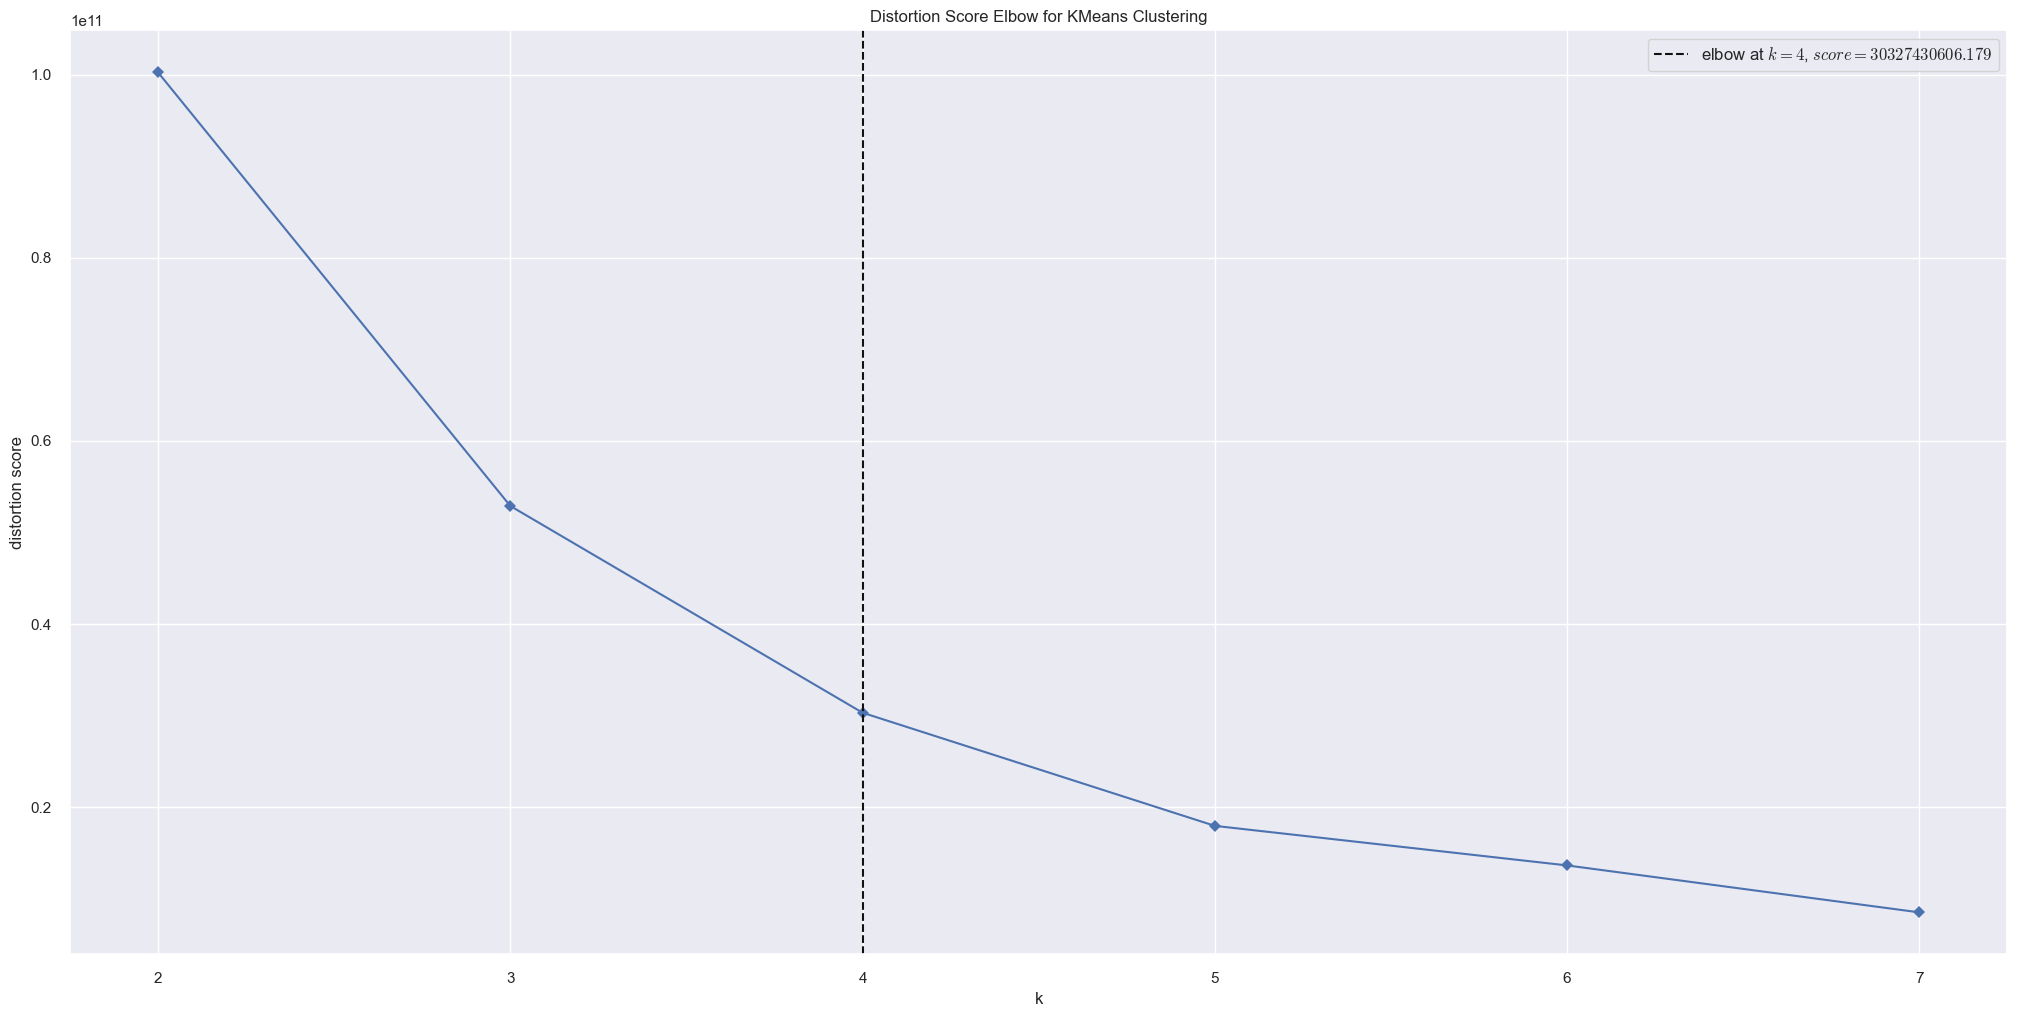

In [24]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,timings=False)
kmeans.fit(X)
kmeans.show();

## 7.2 Silhouette Score

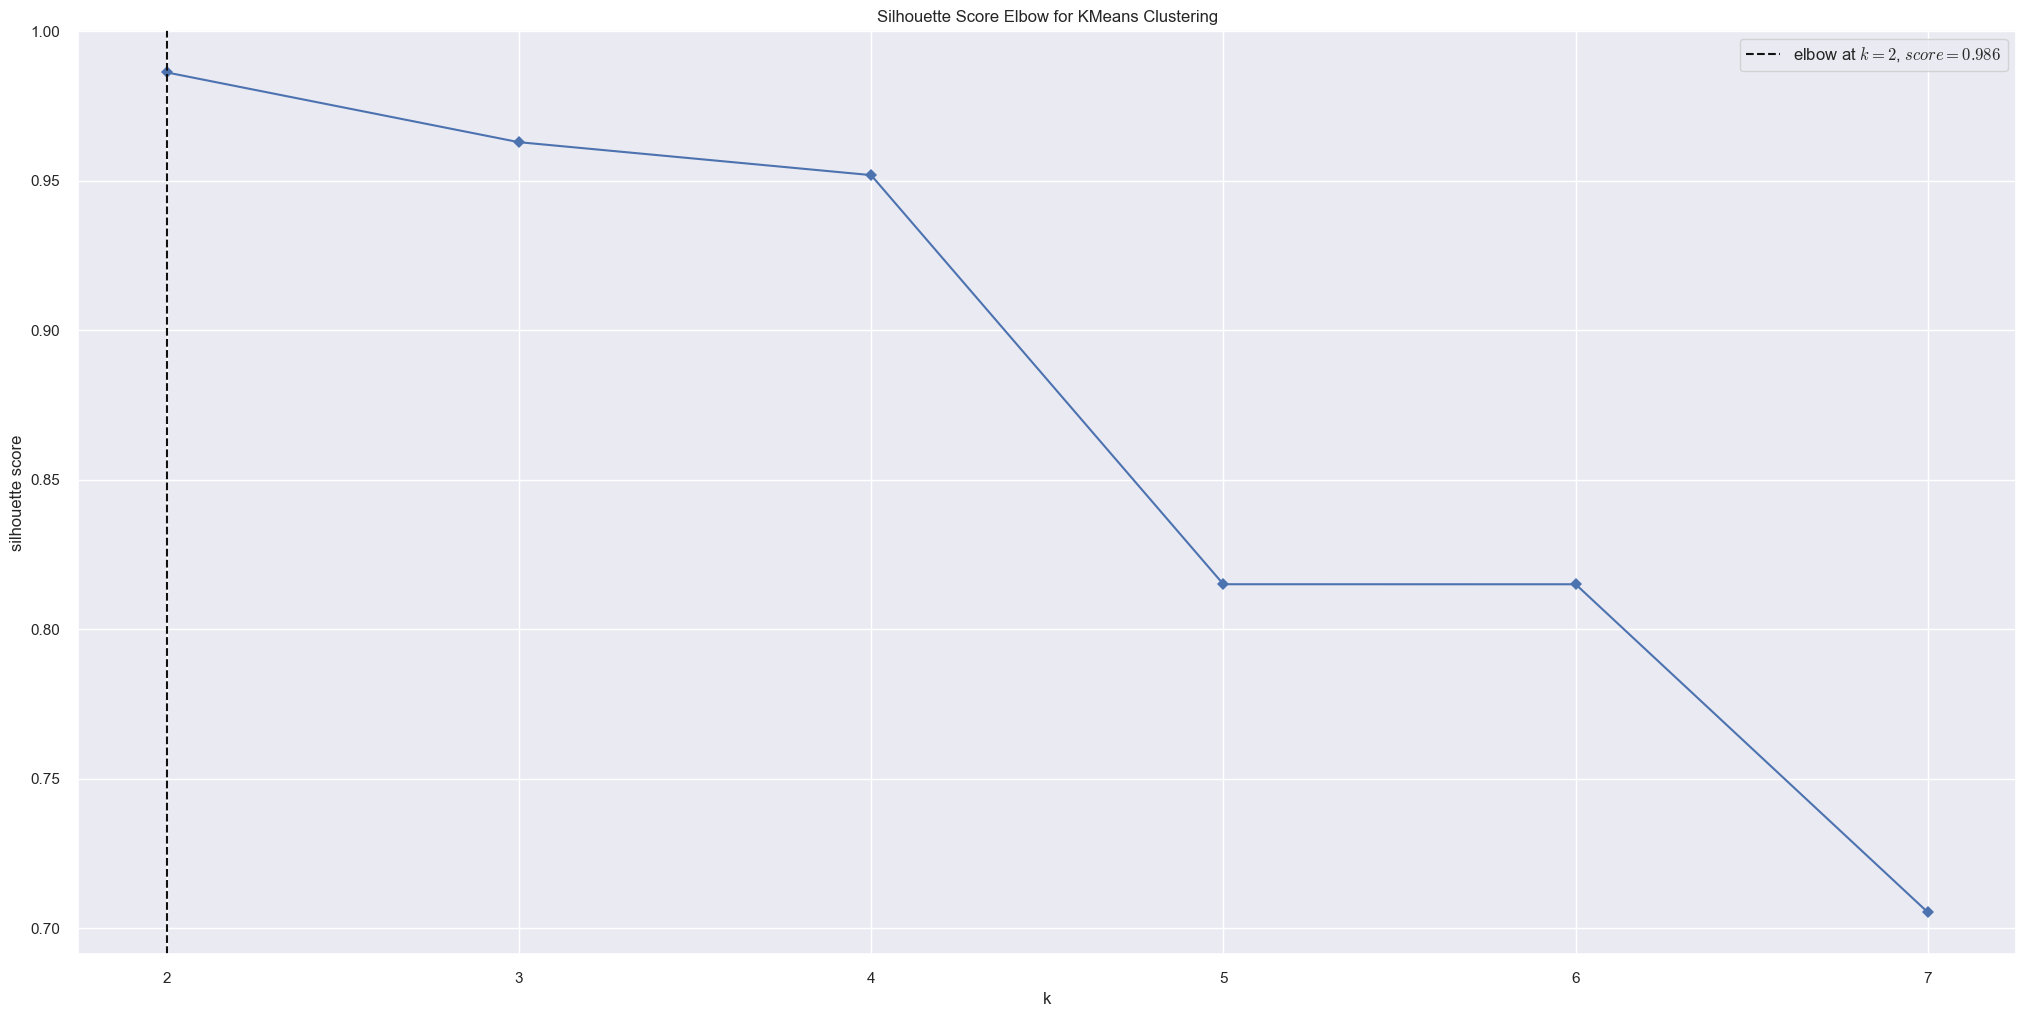

In [25]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,timings=False,metric='silhouette')
kmeans.fit(X)
kmeans.show();

## 7.3 Silhouette Analysis

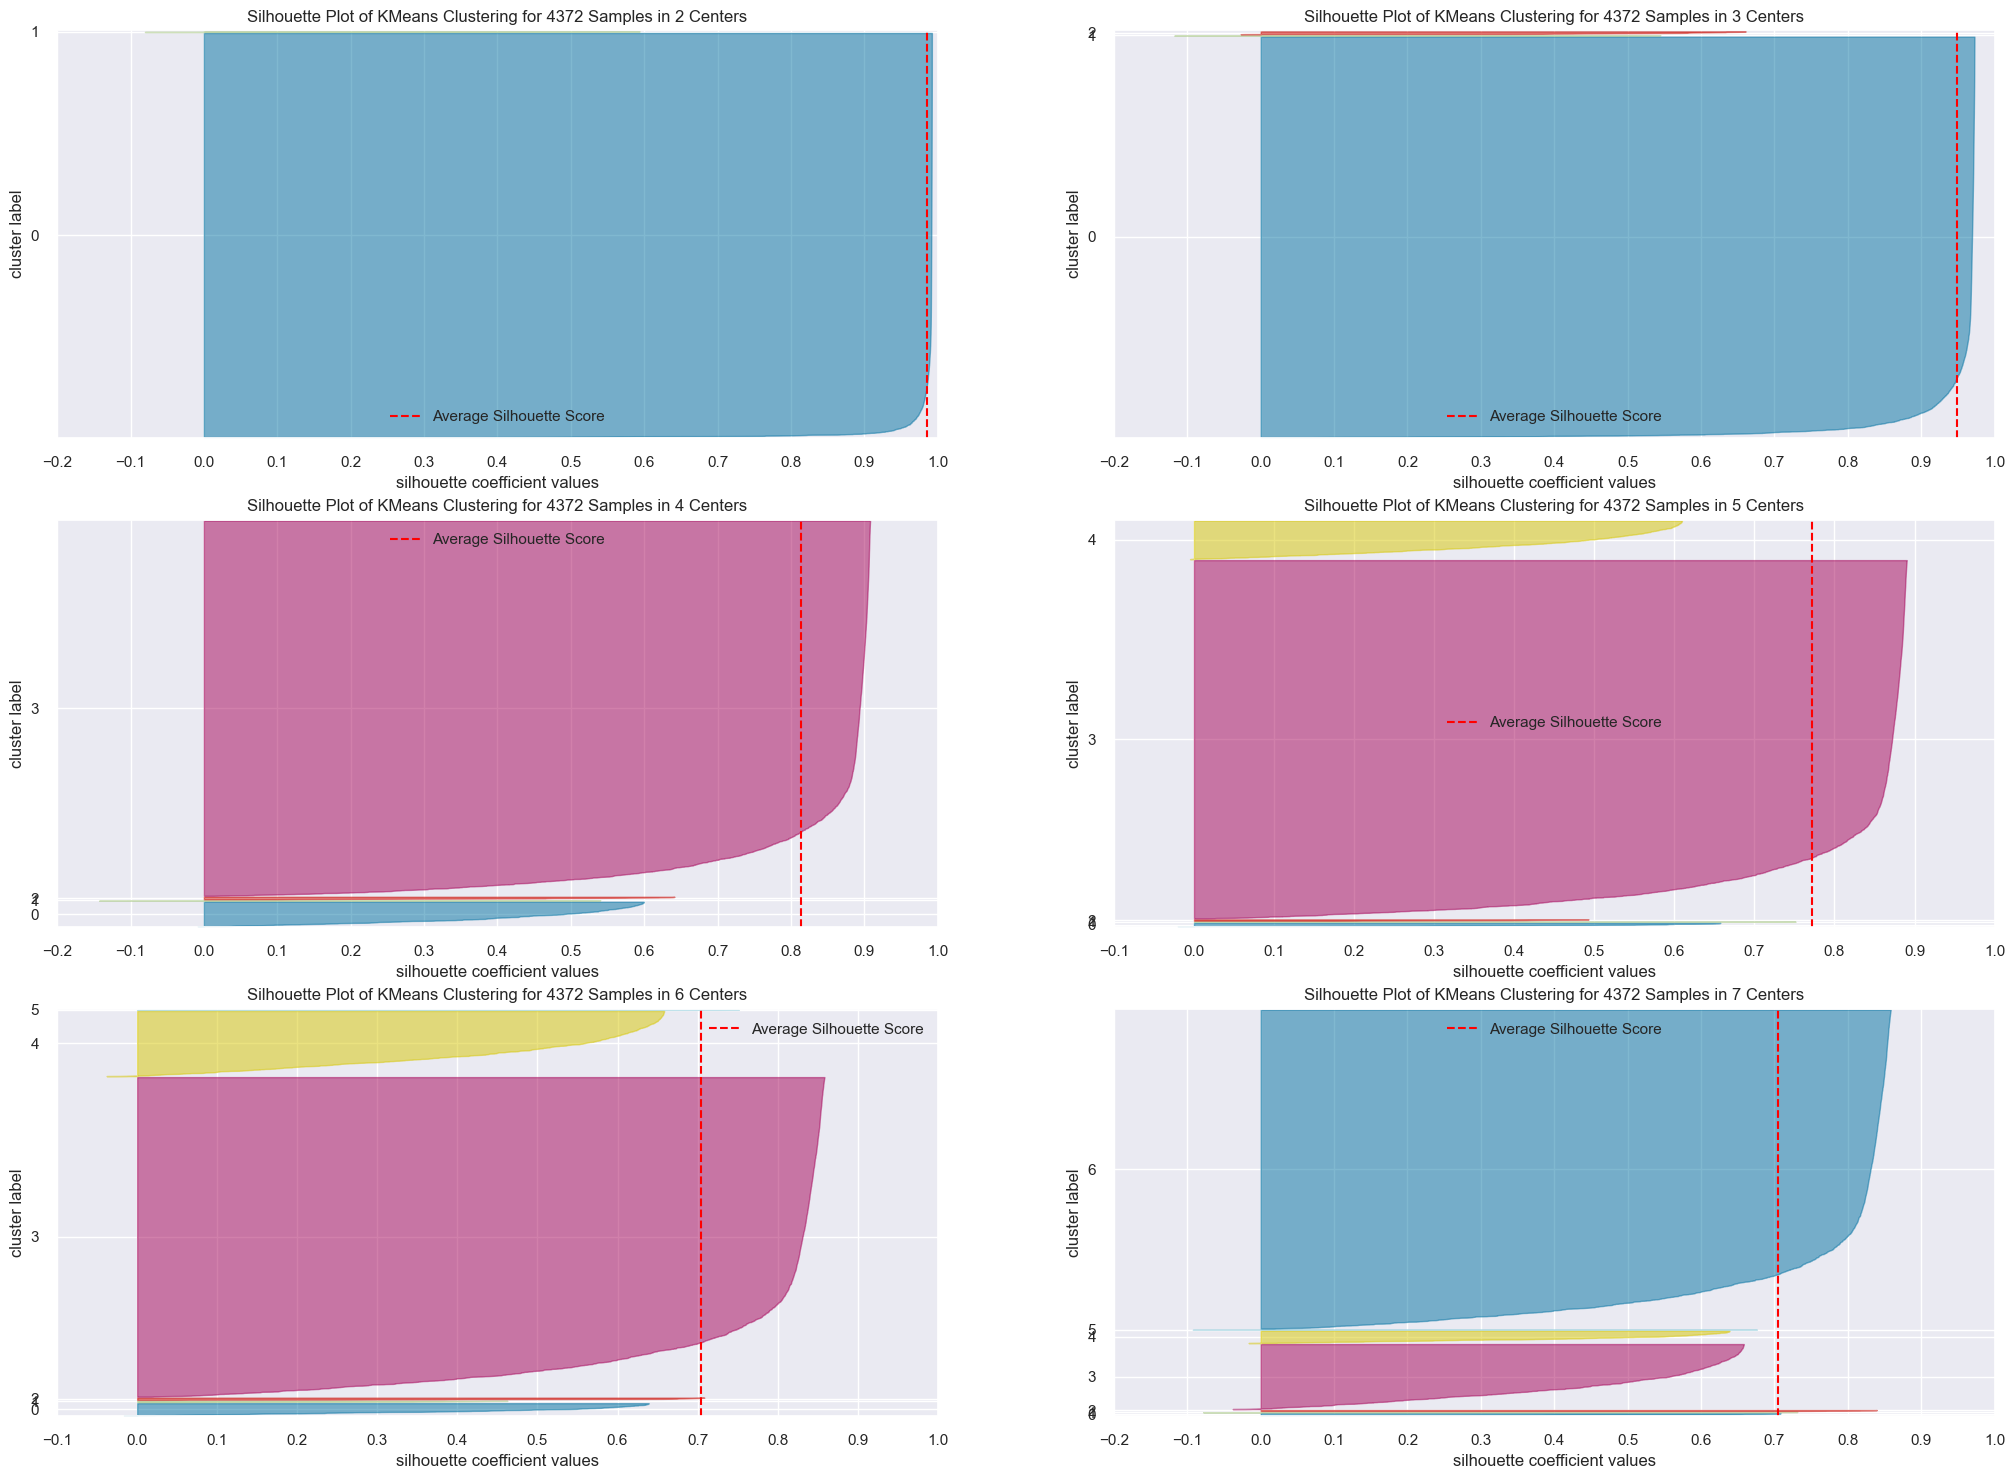

In [26]:
fig, ax = plt.subplots(3,2,figsize = (25,18))

for k in clusters:
  km = c.KMeans(init='random',n_clusters=k,n_init=10,max_iter=100,random_state=42);
  q, mod = divmod(k,2) #2 é o mínimo
  vs = SilhouetteVisualizer(km,colors='yellowbrick',ax=ax[q-1][mod]);
  vs.fit(X);
  vs.finalize();

#A visualização das silhetas não ficou boa pois um cluster fica muito maior que os outros

# <font color = "red"> 8.0 Model Training </font>

In [27]:
df8 = X.copy()

## 8.1 K-Means

In [28]:
k=4 #definido
#model definition
kmeans = c.KMeans(init='random',n_clusters=k,n_init=10,max_iter=300,random_state=42)
#model training
kmeans.fit(df8)
#validation
labels = kmeans.labels_

## 8.2 Cluster Validation

In [29]:
# WSS (Within-Cluster Sum of Square)
print(f'WSS value: {kmeans.inertia_}')

# SS (Silhouette Score)

print('SS value: {}'.format(m.silhouette_score(df8,labels,metric='euclidean')))

WSS value: 40056506734.60243
SS value: 0.8139972028952444


# <font color = "red"> 9.0 Cluster Analysis </font>

In [30]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,0
1,13047,3079.10,31,18,15.709694,3
2,12583,7187.34,2,18,28.634821,0
3,13748,948.25,95,5,33.866071,3
4,15100,635.10,330,6,105.850000,3


## 9.1 Visualization Inspection

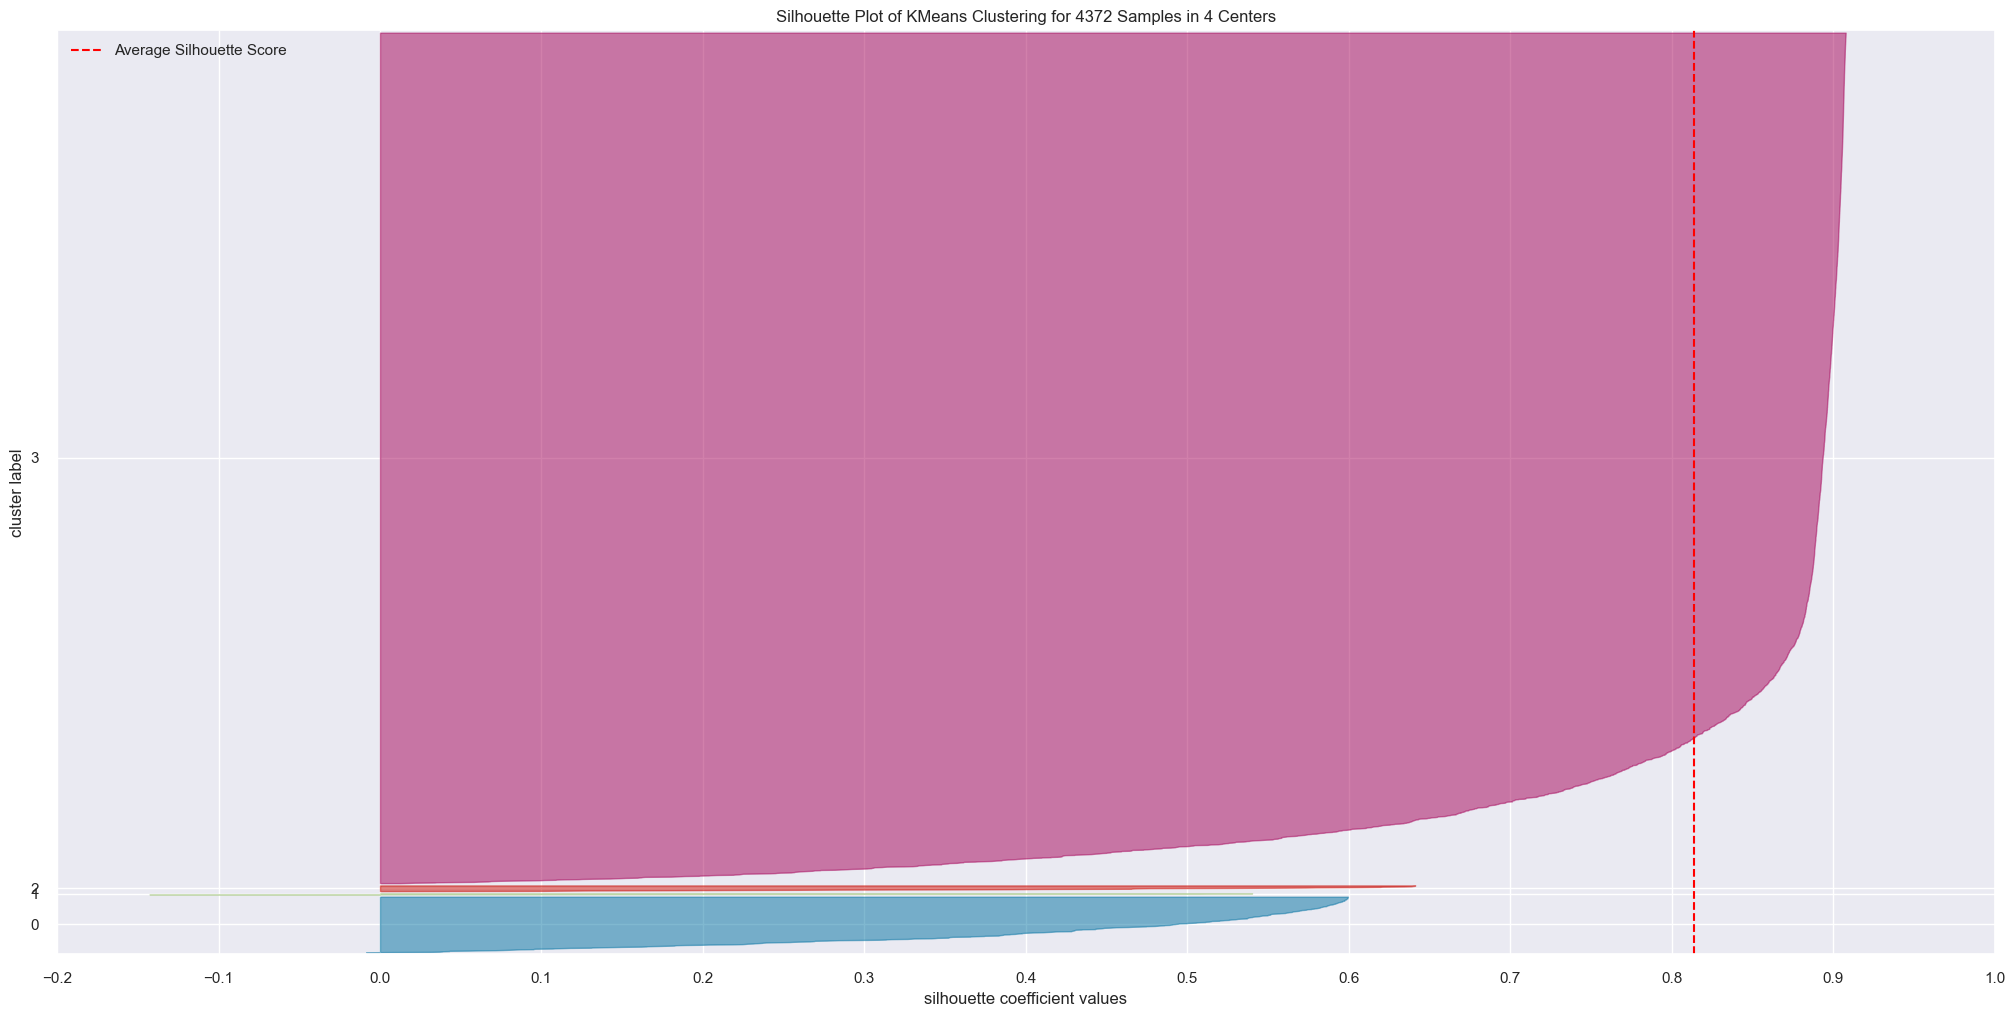

In [31]:
vs = SilhouetteVisualizer(kmeans,colors='yellowbrick');
vs.fit(df8);
vs.finalize();

## 9.2 2d Plot

Quais features estão bagunçando mais do que organizando os dados?

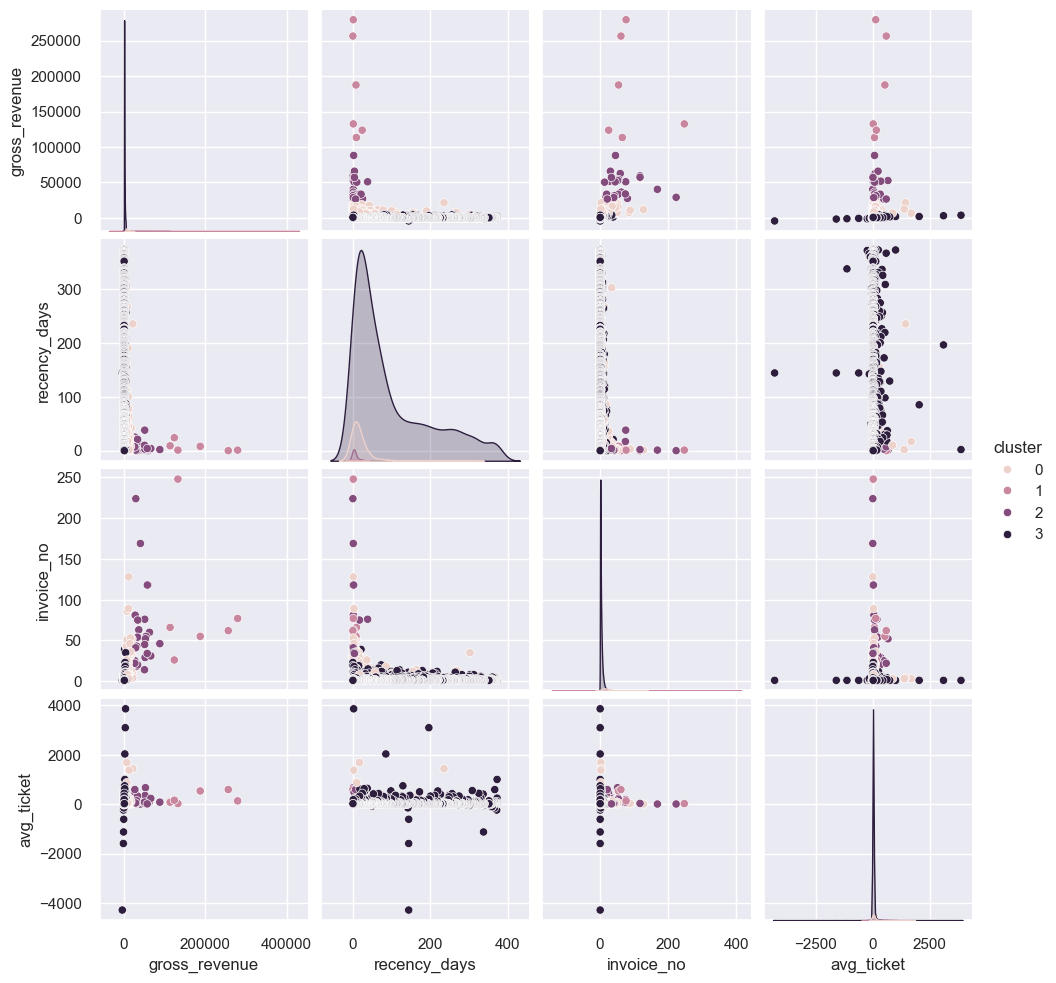

In [32]:
df_viz = df9.drop(columns='customer_id',axis=1)
sns.pairplot(df_viz,hue='cluster')

#Os dados estão muito embolados

## 9.3 UMAP
Abordagem por topologia

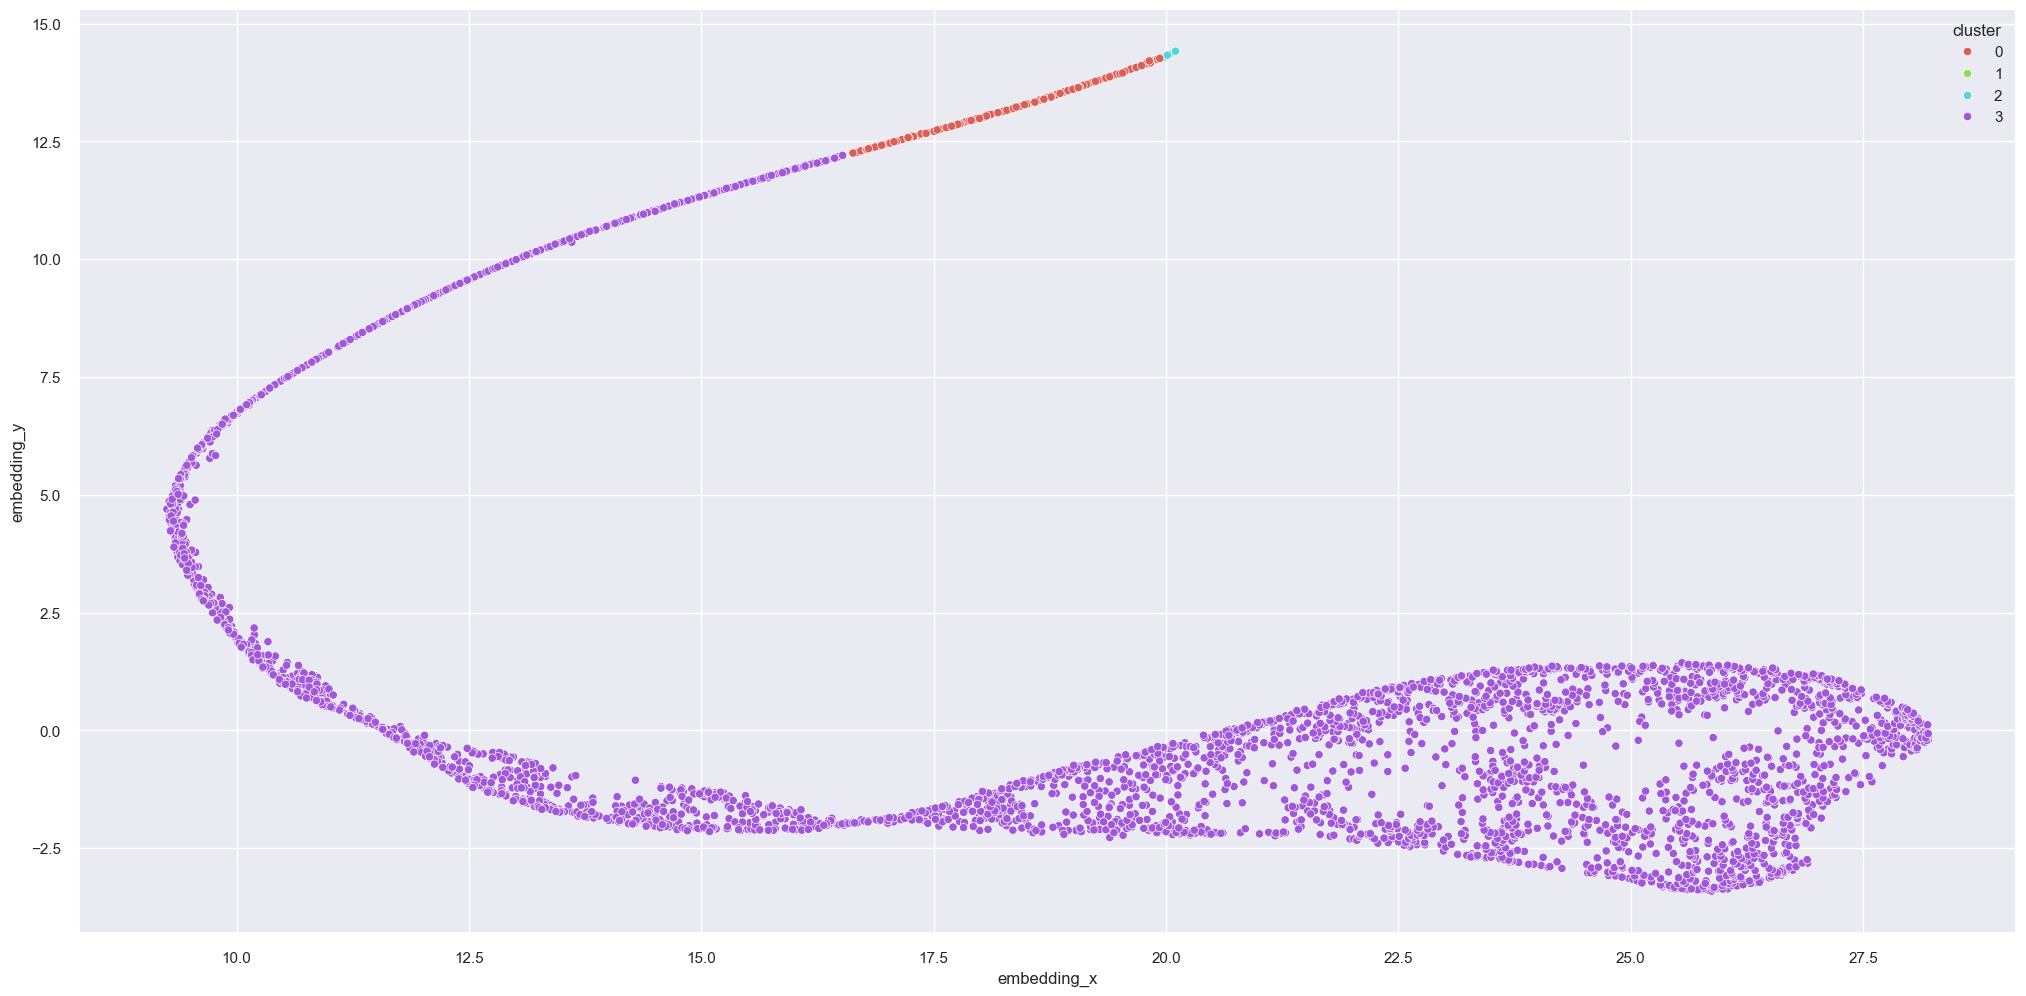

In [38]:
#Projetando o cluster em alta dimensionalidade
#Probabilidade dos pontos serem similares dependendo de quantos vizinhos eu considero
#n_neighbors = quanto menor o número, mais local está olhando, dessa forma, a ideia é fazer um for e ir vendo no que se encaixa

reducer = umap.UMAP(random_state = 42,n_neighbors=50)
embedding = reducer.fit_transform (df8)

#embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y',hue='cluster',palette=sns.color_palette('hls',n_colors=len(df_viz['cluster'].unique())),
                data=df_viz);

In [39]:
# fig = px.scatter_3d(df9,x='recency_days',y='invoice_no',z='gross_revenue',color='cluster')
# fig.show();

## 9.4 Cluster Profile

In [35]:
#Number of customer
df_cluster = df9.loc[:,['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = round((df_cluster['customer_id'] / df_cluster['customer_id'].sum())*100,2)

#Avg Gross revenue
df_avg_gr = df9.loc[:,['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gr,how='inner',on='cluster')

#Avg recency days
df_avg_rd = df9.loc[:,['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_rd,how='inner',on='cluster')

#Avg invoice_no
df_avg_in = df9.loc[:,['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_in,how='inner',on='cluster')
df_cluster

#Avg_ticket 
df_avg_tkt = df9.loc[:,['avg_ticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_tkt,how='inner',on='cluster')
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,267,6.11,8089.028652,20.280899,19.528090,62.783157
1,1,6,0.14,182181.981667,7.166667,89.000000,253.626345
2,2,28,0.64,42614.387143,6.178571,57.821429,162.862605
3,3,4071,93.12,946.696250,96.969295,3.641120,25.359654


**💡 Insights por Cluster**

**Cluster 0 – Clientes Ativos Regulares**

* Representam **6,1% da base** com **receita média razoável**.

* Compram com frequência (≈19 faturas) e retornaram recentemente (~20 dias).

* **Potencial**: aumentar o ticket médio com promoções personalizadas.

* **Ação sugerida**: programa de fidelidade ou cross-sell de produtos relacionados.

**Cluster 1 – Clientes VIP**

* Menor grupo (apenas **0,14% dos clientes**) mas **geram a maior receita**.

* Compram frequentemente (**89 compras**) e com ticket muito alto (R$ 253).

* **Potencial**: altíssimo valor de vida útil (LTV).

* **Ação sugerida**: atendimento personalizado, ofertas exclusivas e reconhecimento de status (ex: “Cliente Ouro”).

**Cluster 2 – Clientes Premium**

* **0,64% da base**, também muito rentáveis.

* Recentes (~6 dias desde a última compra) e com **bom engajamento** (58 compras).

* Ticket médio alto (R$ 162).

* **Ação sugerida**: fortalecer o relacionamento com campanhas de retenção e benefícios para mantê-los ativos.

**Cluster 3 – Clientes Inativos**

* **Maioria absoluta (93%)** da base, mas com **receita mínima** (R$ 946).

* Alta recência (97 dias sem comprar) e baixa frequência (~3,6 compras).

* **Potencial**: reativação ou limpeza de base.

* **Ação sugerida**: campanhas de win-back (“sentimos sua falta”), descontos agressivos ou remarketing.

**🧠 Conclusão Estratégica**

* **Cluster 1 e 2** concentram a **maior parte da receita**, apesar de representarem menos de **1% dos clientes** — sugerindo foco nesses segmentos para maximizar rentabilidade.

* **Cluster 0** pode ser desenvolvido como público-alvo para **crescimento orgânico**.
 
* **Cluster 3** exige **estratégias de reativação** ou revisão da base para reduzir custos de marketing em clientes de baixo retorno.

# <font color = "red"> 10.0 Deploy do Production </font>